<a href="https://colab.research.google.com/github/amira123bd/GiveMeSomeCredit/blob/master/GiveMeSomeCredit_Loan_Default_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**This Work was done Following CRISP-DM Methosology**

**1.Business Understanding**
- forecasting the probabilty of granting a loan to someone.
- predicting the probability that somebody will experience financial distress in the next two years.
-Data for the past 2 years



**2.Data Understanding**

In [167]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


In [168]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [169]:
Train_data=pd.read_csv('/content/drive/MyDrive/Challenge_Kaggle_Credit/cs-training.csv')
Test_data=pd.read_csv('/content/drive/MyDrive/Challenge_Kaggle_Credit/cs-test.csv')

In [170]:

Train_data

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
149995,149996,0,0.040674,74,0,0.225131,2100.0,4,0,1,0,0.0
149996,149997,0,0.299745,44,0,0.716562,5584.0,4,0,1,0,2.0
149997,149998,0,0.246044,58,0,3870.000000,NaN,18,0,1,0,0.0
149998,149999,0,0.000000,30,0,0.000000,5716.0,4,0,0,0,0.0


In [171]:
Test_data

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,NaN,0.885519,43,0,0.177513,5700.0,4,0,0,0,0.0
1,2,NaN,0.463295,57,0,0.527237,9141.0,15,0,4,0,2.0
2,3,NaN,0.043275,59,0,0.687648,5083.0,12,0,1,0,2.0
3,4,NaN,0.280308,38,1,0.925961,3200.0,7,0,2,0,0.0
4,5,NaN,1.000000,27,0,0.019917,3865.0,4,0,0,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
101498,101499,NaN,0.282653,24,0,0.068522,1400.0,5,0,0,0,0.0
101499,101500,NaN,0.922156,36,3,0.934217,7615.0,8,0,2,0,4.0
101500,101501,NaN,0.081596,70,0,836.000000,NaN,3,0,0,0,NaN
101501,101502,NaN,0.335457,56,0,3568.000000,NaN,8,0,2,1,3.0


In [172]:
print('shape of training data {}'.format(Train_data.shape))
print('shape of test data {}'.format(Test_data.shape))


shape of training data (150000, 12)
shape of test data (101503, 12)


In [173]:
for column in Train_data.columns:
  print('Unique value in  {}'.format(column))
  print(len(Train_data[column].unique()),Train_data[column].unique())

Unique value in  Unnamed: 0
150000 [     1      2      3 ... 149998 149999 150000]
Unique value in  SeriousDlqin2yrs
2 [1 0]
Unique value in  RevolvingUtilizationOfUnsecuredLines
125728 [0.76612661 0.95715102 0.65818014 ... 0.29974515 0.24604392 0.85028295]
Unique value in  age
86 [ 45  40  38  30  49  74  57  39  27  51  46  76  64  78  53  43  25  32
  58  50  69  24  28  62  42  75  26  52  41  81  31  68  70  73  29  55
  35  72  60  67  36  56  37  66  83  34  44  48  61  80  47  59  77  63
  54  33  79  65  86  92  23  87  71  22  90  97  84  82  91  89  85  88
  21  93  96  99  94  95 101  98 103 102 107 105   0 109]
Unique value in  NumberOfTime30-59DaysPastDueNotWorse
16 [ 2  0  1  3  4  5  7 10  6 98 12  8  9 96 13 11]
Unique value in  DebtRatio
114194 [0.80298213 0.1218762  0.08511338 ... 0.40429286 0.71656222 0.24990808]
Unique value in  MonthlyIncome
13595 [ 9120.  2600.  3042. ... 15648.   521.  7647.]
Unique value in  NumberOfOpenCreditLinesAndLoans
58 [13  4  2  5  7  3

In [174]:
Train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 12 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   Unnamed: 0                            150000 non-null  int64  
 1   SeriousDlqin2yrs                      150000 non-null  int64  
 2   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 3   age                                   150000 non-null  int64  
 4   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 5   DebtRatio                             150000 non-null  float64
 6   MonthlyIncome                         120269 non-null  float64
 7   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 8   NumberOfTimes90DaysLate               150000 non-null  int64  
 9   NumberRealEstateLoansOrLines          150000 non-null  int64  
 10  NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 11  

In [175]:
Train_data.describe()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,1.202690e+05,150000.000000,150000.000000,150000.000000,150000.000000,146076.000000
mean,75000.500000,0.066840,6.048438,52.295207,0.421033,353.005076,6.670221e+03,8.452760,0.265973,1.018240,0.240387,0.757222
std,43301.414527,0.249746,249.755371,14.771866,4.192781,2037.818523,1.438467e+04,5.145951,4.169304,1.129771,4.155179,1.115086
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,37500.750000,0.000000,0.029867,41.000000,0.000000,0.175074,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,75000.500000,0.000000,0.154181,52.000000,0.000000,0.366508,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,112500.250000,0.000000,0.559046,63.000000,0.000000,0.868254,8.249000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,150000.000000,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


In [176]:
Train_data['MonthlyIncome'].isnull().sum()

29731

In [177]:
#Train_data.dropna()


In [178]:
#Test_data.dropna()

In [179]:
Test_data.describe()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,101503.000000,0.0,101503.000000,101503.000000,101503.000000,101503.000000,8.140000e+04,101503.000000,101503.000000,101503.000000,101503.000000,98877.000000
mean,50752.000000,NaN,5.310000,52.405436,0.453770,344.475020,6.855036e+03,8.453514,0.296691,1.013074,0.270317,0.769046
std,29301.536524,NaN,196.156039,14.779756,4.538487,1632.595231,3.650860e+04,5.144100,4.515859,1.110253,4.503578,1.136778
min,1.000000,NaN,0.000000,21.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25376.500000,NaN,0.030131,41.000000,0.000000,0.173423,3.408000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,50752.000000,NaN,0.152586,52.000000,0.000000,0.364260,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,76127.500000,NaN,0.564225,63.000000,0.000000,0.851619,8.200000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,101503.000000,NaN,21821.000000,104.000000,98.000000,268326.000000,7.727000e+06,85.000000,98.000000,37.000000,98.000000,43.000000


In [180]:
Train_data.describe()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,1.202690e+05,150000.000000,150000.000000,150000.000000,150000.000000,146076.000000
mean,75000.500000,0.066840,6.048438,52.295207,0.421033,353.005076,6.670221e+03,8.452760,0.265973,1.018240,0.240387,0.757222
std,43301.414527,0.249746,249.755371,14.771866,4.192781,2037.818523,1.438467e+04,5.145951,4.169304,1.129771,4.155179,1.115086
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,37500.750000,0.000000,0.029867,41.000000,0.000000,0.175074,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,75000.500000,0.000000,0.154181,52.000000,0.000000,0.366508,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,112500.250000,0.000000,0.559046,63.000000,0.000000,0.868254,8.249000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,150000.000000,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


In [181]:
#plt.figure(figsize=(12,10))
#sns.violinplot(x='DebtRatio',y='SeriousDlqin2yrs',data=Train_data)



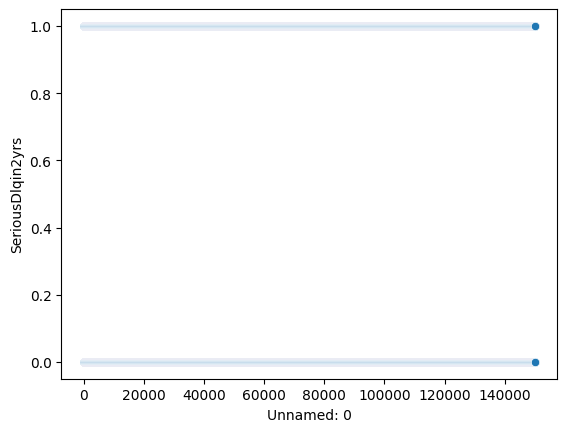

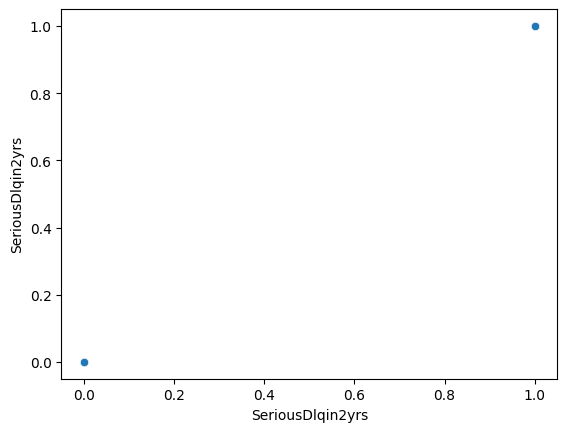

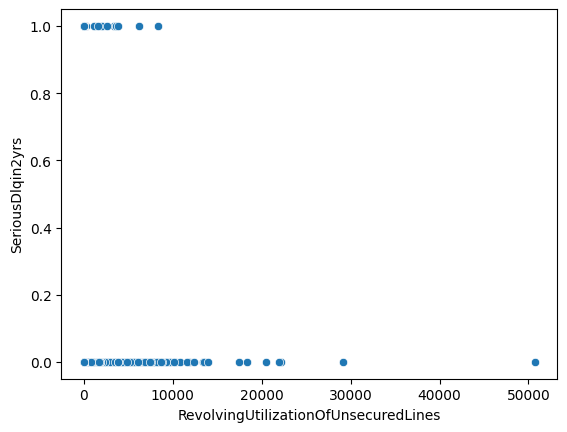

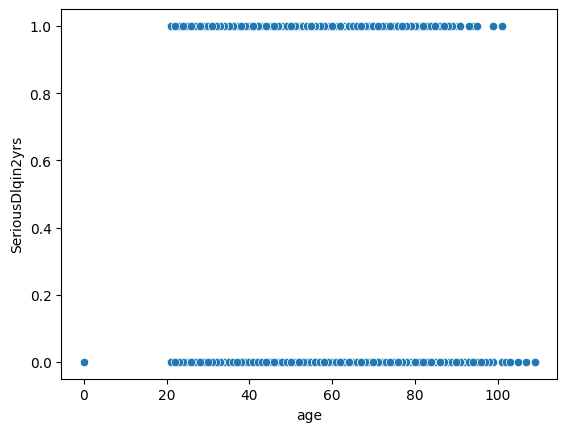

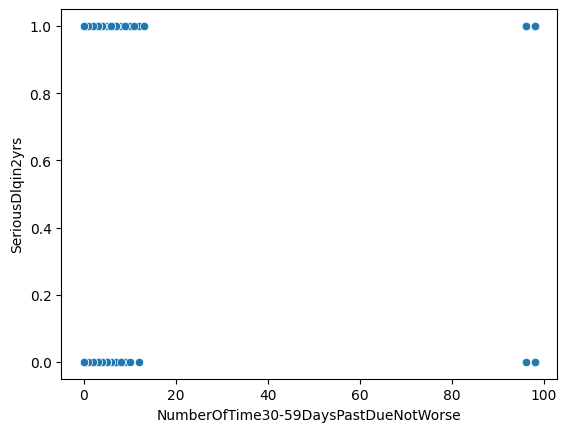

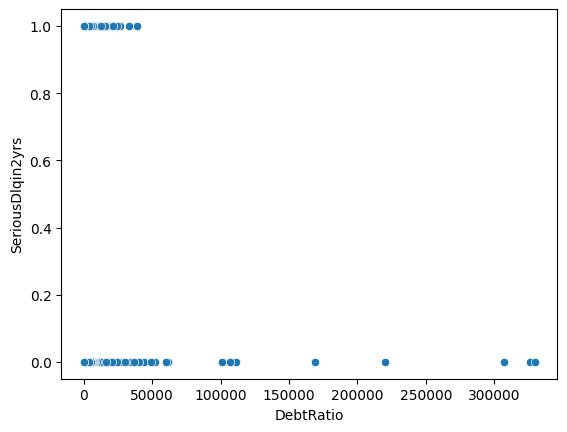

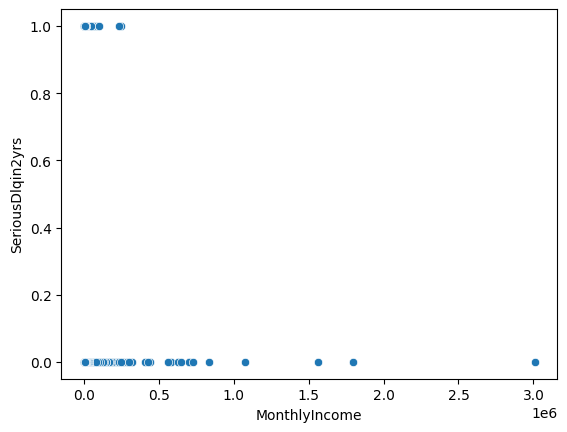

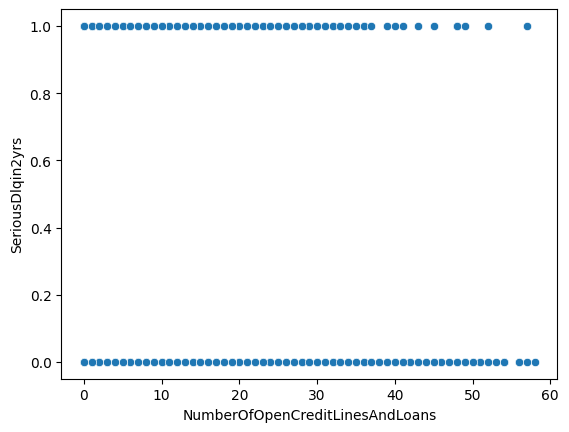

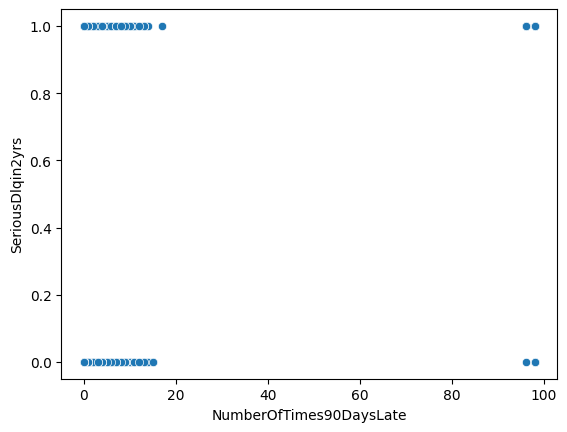

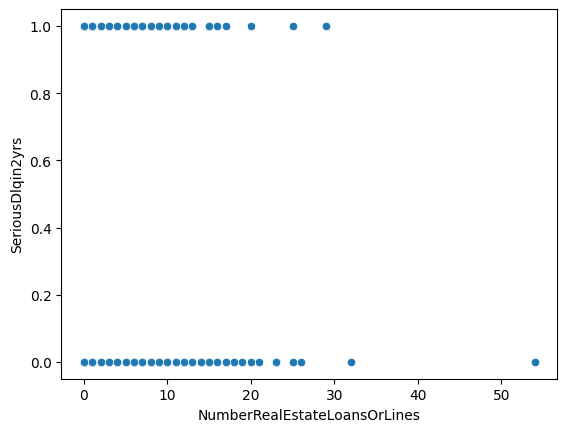

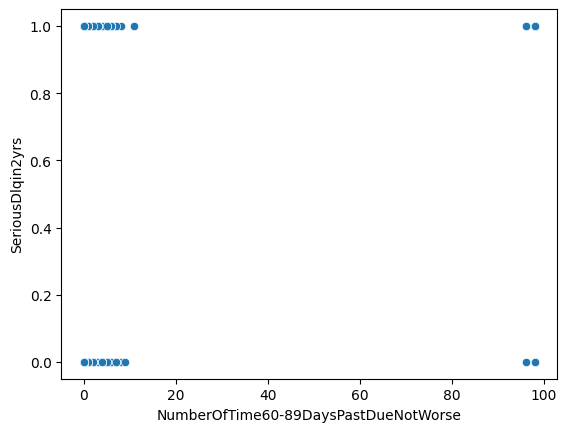

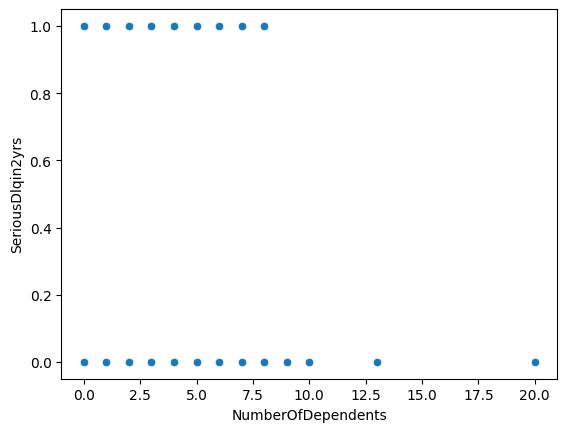

In [182]:
for column in Train_data.columns:
  sns.scatterplot(data=Train_data,y=Train_data['SeriousDlqin2yrs'],x=column)
  plt.show()

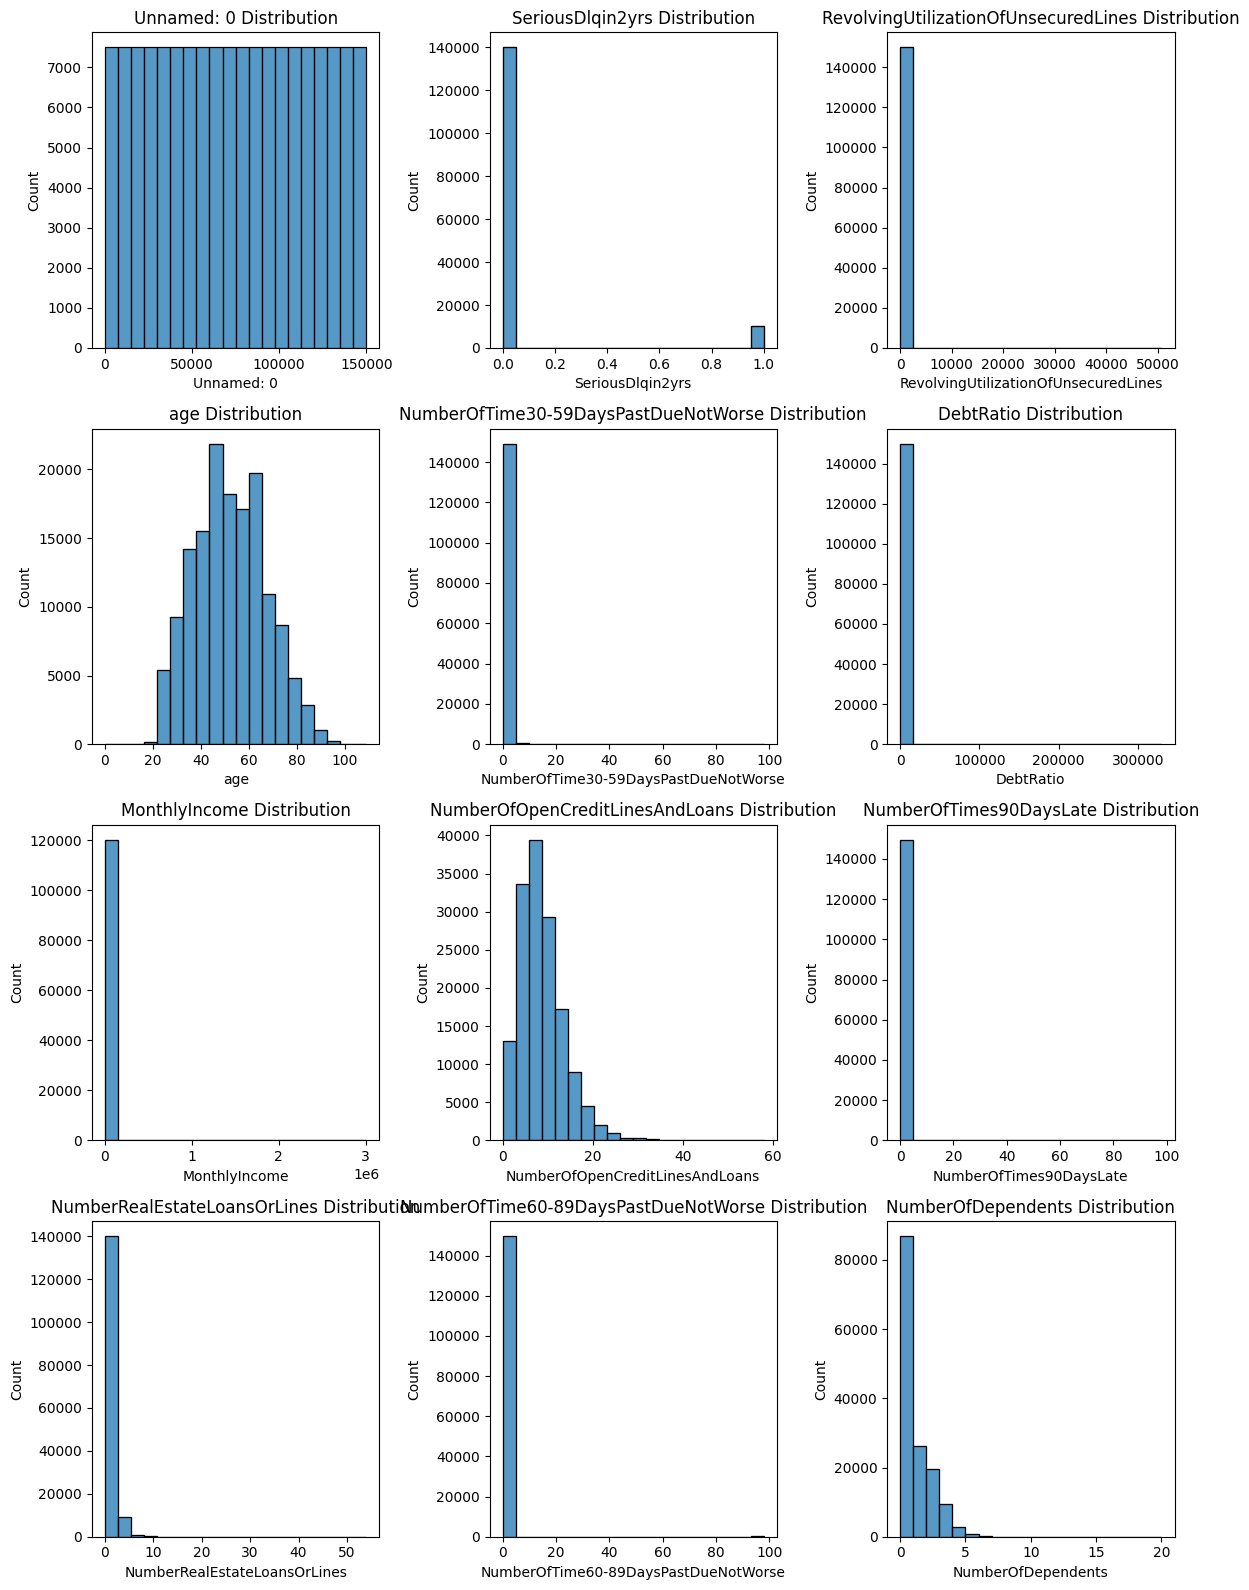

In [183]:
plt.figure(figsize=(12,16))
for i, j in enumerate(Train_data.describe().columns):
    plt.subplot(4,3, i+1)
    sns.histplot(x=Train_data[j],bins=20)
    plt.xlabel(j)
    plt.title('{} Distribution'.format(j))
    # plt.subplots_adjust(wspace=.2, hspace=.5)
    plt.tight_layout()
plt.show()

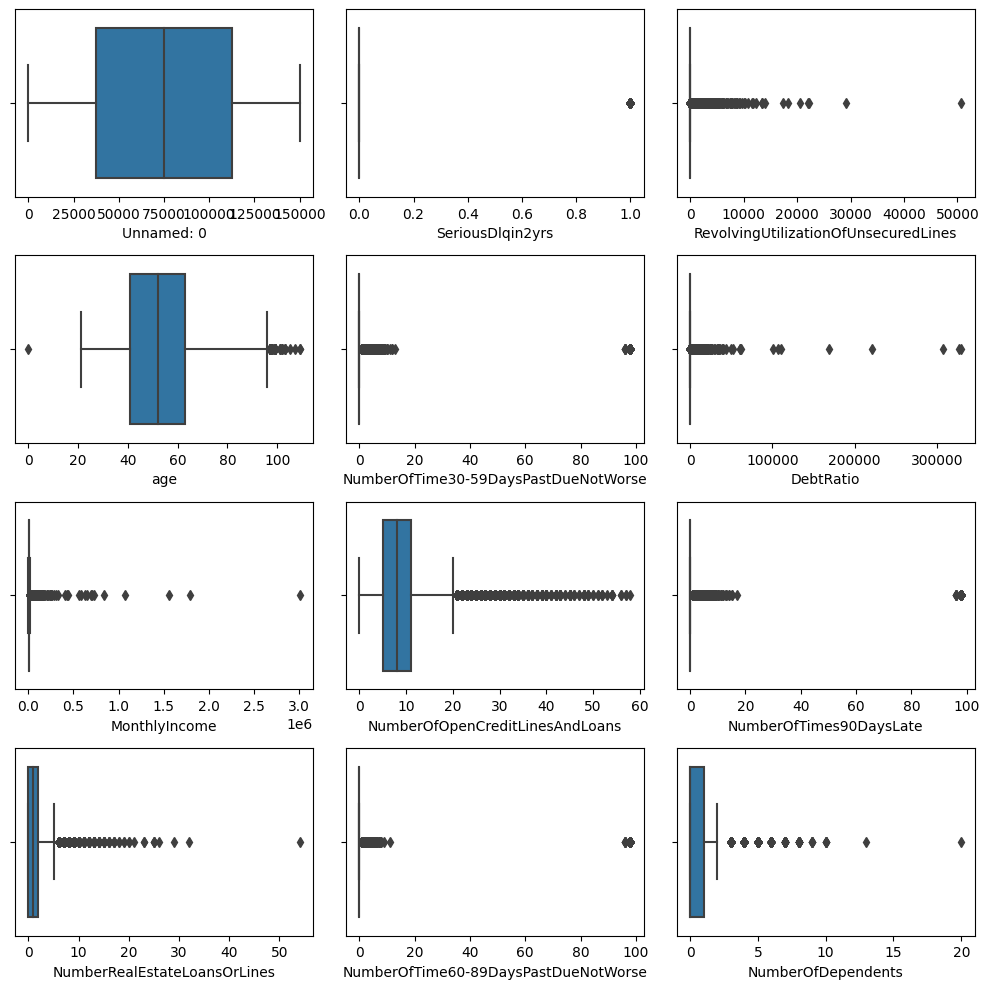

In [184]:
plt.figure(figsize=(10,10))
for i,j in enumerate(Train_data.describe().columns):
  plt.subplot(4,3, i+1)
  sns.boxplot(x=Train_data[j])
  plt.tight_layout()
plt.show()

In [185]:
Train_data.corr()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
Unnamed: 0,1.000000,0.002801,0.002372,0.004403,-0.000571,-0.002906,0.002632,0.004586,-0.001104,-0.000666,-0.000777,-0.000055
SeriousDlqin2yrs,0.002801,1.000000,-0.001802,-0.115386,0.125587,-0.007602,-0.019746,-0.029669,0.117175,-0.007038,0.102261,0.046048
RevolvingUtilizationOfUnsecuredLines,0.002372,-0.001802,1.000000,-0.005898,-0.001314,0.003961,0.007124,-0.011281,-0.001061,0.006235,-0.001048,0.001557
age,0.004403,-0.115386,-0.005898,1.000000,-0.062995,0.024188,0.037717,0.147705,-0.061005,0.033150,-0.057159,-0.213303
NumberOfTime30-59DaysPastDueNotWorse,-0.000571,0.125587,-0.001314,-0.062995,1.000000,-0.006542,-0.010217,-0.055312,0.983603,-0.030565,0.987005,-0.002680
DebtRatio,-0.002906,-0.007602,0.003961,0.024188,-0.006542,1.000000,-0.028712,0.049565,-0.008320,0.120046,-0.007533,-0.040673
MonthlyIncome,0.002632,-0.019746,0.007124,0.037717,-0.010217,-0.028712,1.000000,0.091455,-0.012743,0.124959,-0.011116,0.062647
NumberOfOpenCreditLinesAndLoans,0.004586,-0.029669,-0.011281,0.147705,-0.055312,0.049565,0.091455,1.000000,-0.079984,0.433959,-0.071077,0.065322
NumberOfTimes90DaysLate,-0.001104,0.117175,-0.001061,-0.061005,0.983603,-0.008320,-0.012743,-0.079984,1.000000,-0.045205,0.992796,-0.010176
NumberRealEstateLoansOrLines,-0.000666,-0.007038,0.006235,0.033150,-0.030565,0.120046,0.124959,0.433959,-0.045205,1.000000,-0.039722,0.124684


<Axes: >

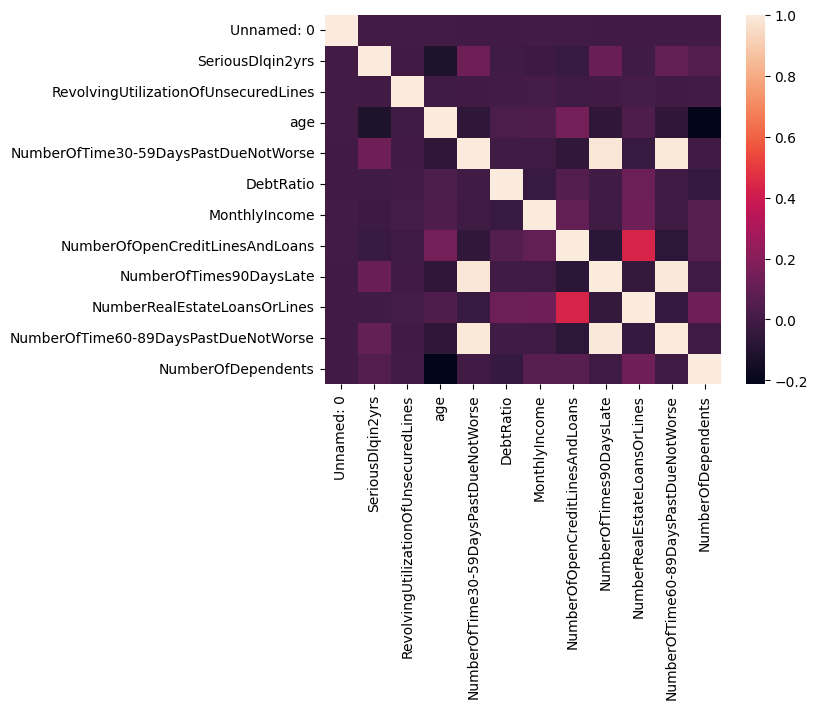

In [186]:
sns.heatmap(Train_data.corr())

We can see a strong correlation between ( NumberOfTime30-59DaysPastDueNotWorse, NumberOfTime60-89DaysPastDueNotWorse	, NumberOfTimes90DaysLate	)

In [187]:
print(Train_data['NumberOfTime60-89DaysPastDueNotWorse'].corr(Train_data['NumberOfTime30-59DaysPastDueNotWorse']))
print(Train_data['NumberOfTime60-89DaysPastDueNotWorse'].corr(Train_data['NumberOfTimes90DaysLate']))
print(Train_data['NumberOfTimes90DaysLate'].corr(Train_data['NumberOfTime30-59DaysPastDueNotWorse']))


0.9870054474799461
0.9927961825915981
0.9836026812820766


In [188]:
#Delete row where age=0 (outlier)
index=Train_data[Train_data['age']==0].index
Train_data.drop(index,inplace=True)

In [189]:
Train_data.drop(columns=['Unnamed: 0'],inplace=True)

In [190]:
Test_data.drop(columns=['Unnamed: 0'],inplace=True)

In [191]:
Train_data

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
149995,0,0.040674,74,0,0.225131,2100.0,4,0,1,0,0.0
149996,0,0.299745,44,0,0.716562,5584.0,4,0,1,0,2.0
149997,0,0.246044,58,0,3870.000000,NaN,18,0,1,0,0.0
149998,0,0.000000,30,0,0.000000,5716.0,4,0,0,0,0.0


In [192]:
Train_data.describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,149999.000000,149999.000000,149999.000000,149999.000000,149999.000000,1.202680e+05,149999.000000,149999.000000,149999.000000,149999.000000,146075.000000
mean,0.066840,6.048472,52.295555,0.421029,353.007426,6.670227e+03,8.452776,0.265975,1.018233,0.240388,0.757214
std,0.249746,249.756203,14.771298,4.192795,2037.825113,1.438473e+04,5.145964,4.169318,1.129772,4.155193,1.115085
min,0.000000,0.000000,21.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.029867,41.000000,0.000000,0.175074,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.154176,52.000000,0.000000,0.366503,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.559044,63.000000,0.000000,0.868257,8.249000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


In [193]:
Train_data.isnull().sum()

SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           29731
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3924
dtype: int64

In [194]:
Test_data.isnull().sum()

SeriousDlqin2yrs                        101503
RevolvingUtilizationOfUnsecuredLines         0
age                                          0
NumberOfTime30-59DaysPastDueNotWorse         0
DebtRatio                                    0
MonthlyIncome                            20103
NumberOfOpenCreditLinesAndLoans              0
NumberOfTimes90DaysLate                      0
NumberRealEstateLoansOrLines                 0
NumberOfTime60-89DaysPastDueNotWorse         0
NumberOfDependents                        2626
dtype: int64

In [195]:
##imputation to handle missing data
columns=['RevolvingUtilizationOfUnsecuredLines','age','NumberOfTime30-59DaysPastDueNotWorse','DebtRatio','MonthlyIncome','NumberOfOpenCreditLinesAndLoans','NumberOfTimes90DaysLate','NumberRealEstateLoansOrLines','NumberOfTime60-89DaysPastDueNotWorse','NumberOfDependents']

from sklearn.impute import IterativeImputer

from sklearn.impute import KNNImputer
imputer1 = IterativeImputer()
imputer=KNNImputer()
Train_data[columns]=imputer1.fit_transform(Train_data[columns])


In [198]:
Train_data.isnull().sum()

SeriousDlqin2yrs                        0
RevolvingUtilizationOfUnsecuredLines    0
age                                     0
NumberOfTime30-59DaysPastDueNotWorse    0
DebtRatio                               0
MonthlyIncome                           0
NumberOfOpenCreditLinesAndLoans         0
NumberOfTimes90DaysLate                 0
NumberRealEstateLoansOrLines            0
NumberOfTime60-89DaysPastDueNotWorse    0
NumberOfDependents                      0
dtype: int64

In [200]:
Test_data[columns]=imputer1.transform(Test_data[columns])


In [201]:
Test_data.isnull().sum()

SeriousDlqin2yrs                        101503
RevolvingUtilizationOfUnsecuredLines         0
age                                          0
NumberOfTime30-59DaysPastDueNotWorse         0
DebtRatio                                    0
MonthlyIncome                                0
NumberOfOpenCreditLinesAndLoans              0
NumberOfTimes90DaysLate                      0
NumberRealEstateLoansOrLines                 0
NumberOfTime60-89DaysPastDueNotWorse         0
NumberOfDependents                           0
dtype: int64

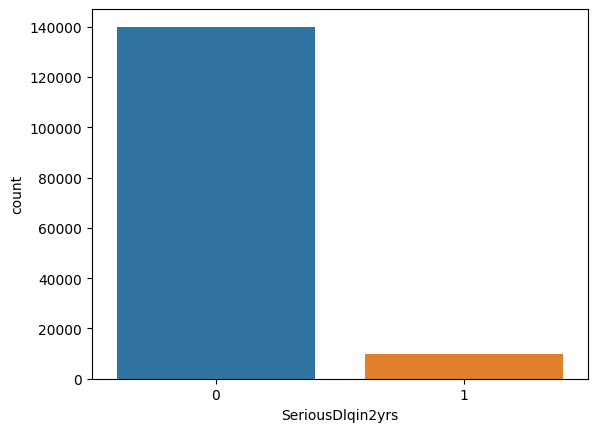

In [202]:
sns.countplot(x='SeriousDlqin2yrs',data=Train_data)
plt.show()

In [203]:
Train_data['SeriousDlqin2yrs'].value_counts()

0    139973
1     10026
Name: SeriousDlqin2yrs, dtype: int64

In [204]:
from sklearn.utils import resample
#create two different dataframe of majority and minority class
df_majority = Train_data[(Train_data['SeriousDlqin2yrs']==0)]
df_minority = Train_data[(Train_data['SeriousDlqin2yrs']==1)]
# upsample minority class
df_minority_upsampled = resample(df_minority,
                                 replace=True,    # sample with replacement
                                 n_samples= 139973, # to match majority class
                                 random_state=42)  # reproducible results
# Combine majority class with upsampled minority class
Train_data= pd.concat([df_minority_upsampled, df_majority])

In [205]:
Train_data['SeriousDlqin2yrs'].value_counts()

1    139973
0    139973
Name: SeriousDlqin2yrs, dtype: int64

**Modeling**

In [206]:
X=Train_data.drop(columns=['SeriousDlqin2yrs'])

In [207]:
X

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
108932,0.455982,36.0,0.0,0.518825,8100.000000,12.0,1.0,1.0,0.0,2.0
13215,1.000000,30.0,1.0,0.109424,5400.000000,4.0,3.0,0.0,2.0,0.0
81371,1.000000,25.0,0.0,0.154211,4000.000000,3.0,0.0,0.0,0.0,0.0
78054,1.000000,36.0,0.0,0.208044,2162.000000,2.0,1.0,0.0,1.0,3.0
86466,1.264890,60.0,3.0,0.295894,5795.000000,7.0,4.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...
149995,0.040674,74.0,0.0,0.225131,2100.000000,4.0,0.0,1.0,0.0,0.0
149996,0.299745,44.0,0.0,0.716562,5584.000000,4.0,0.0,1.0,0.0,2.0
149997,0.246044,58.0,0.0,3870.000000,3203.967613,18.0,0.0,1.0,0.0,0.0
149998,0.000000,30.0,0.0,0.000000,5716.000000,4.0,0.0,0.0,0.0,0.0


In [208]:
y=Train_data['SeriousDlqin2yrs']

In [209]:
y

108932    1
13215     1
81371     1
78054     1
86466     1
         ..
149995    0
149996    0
149997    0
149998    0
149999    0
Name: SeriousDlqin2yrs, Length: 279946, dtype: int64

In [210]:
from sklearn.model_selection import train_test_split
import numpy as np
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [211]:
y_train = np.reshape(y_train.values, (y_train.shape[0], 1))


In [212]:
y_test = np.reshape(y_test.values, (y_test.shape[0], 1))


In [213]:
print('shapes:')
print(' x_train{}'.format(x_train.shape))
print(' y_train{}'.format(y_train.shape))
print(' x_test{}'.format(x_test.shape))
print(' y_test{}'.format(y_test.shape))


shapes:
 x_train(223956, 10)
 y_train(223956, 1)
 x_test(55990, 10)
 y_test(55990, 1)


In [214]:
from sklearn.neighbors import KNeighborsClassifier as knn
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,classification_report

In [215]:
def predict_(algorithm):
  algorithm.fit(x_train,y_train)
  return(algorithm.predict(x_test))

In [216]:
def metrics_(model,_prediction_):
  acc=accuracy_score(y_test,_prediction_)
  class_report=classification_report(y_test,_prediction_)
  print(f"for {model.__class__.__name__}")
  print(f"accuracy : {acc*100} %")
  print("Classification report : ")
  print(f"{class_report}")



In [217]:
KNN_prediction=predict_(knn(n_neighbors=2))
SGD_prediction=predict_(SGDClassifier())
Tree_prediction=predict_(DecisionTreeClassifier())
Naive_prediction=predict_(GaussianNB())

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [218]:
metrics_(knn(n_neighbors=4),KNN_prediction)
metrics_(SGDClassifier(),SGD_prediction)
metrics_(DecisionTreeClassifier(),Tree_prediction)
metrics_(GaussianNB(),Naive_prediction)

for KNeighborsClassifier
accuracy : 97.17806751205572 %
Classification report : 
              precision    recall  f1-score   support

           0       1.00      0.94      0.97     27976
           1       0.95      1.00      0.97     28014

    accuracy                           0.97     55990
   macro avg       0.97      0.97      0.97     55990
weighted avg       0.97      0.97      0.97     55990

for SGDClassifier
accuracy : 50.982318271119844 %
Classification report : 
              precision    recall  f1-score   support

           0       0.69      0.03      0.07     27976
           1       0.51      0.98      0.67     28014

    accuracy                           0.51     55990
   macro avg       0.60      0.51      0.37     55990
weighted avg       0.60      0.51      0.37     55990

for DecisionTreeClassifier
accuracy : 96.88158599749956 %
Classification report : 
              precision    recall  f1-score   support

           0       1.00      0.94      0.97     2797

Voting Classifier

In [219]:
from sklearn.ensemble import VotingClassifier

In [220]:
model=VotingClassifier([('KNN',knn(n_neighbors=2)),('SGD',SGDClassifier(loss='log')),('DTC',DecisionTreeClassifier()),('GNB',GaussianNB())],voting='soft')
voting_prediction=predict_(model)
metrics_(model,voting_prediction)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


for VotingClassifier
accuracy : 99.2320057153063 %
Classification report : 
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     27976
           1       0.99      1.00      0.99     28014

    accuracy                           0.99     55990
   macro avg       0.99      0.99      0.99     55990
weighted avg       0.99      0.99      0.99     55990



Bagging Classifier

In [221]:
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier

In [222]:
model2=BaggingClassifier(base_estimator=GaussianNB(),n_estimators=100)
Bagging_prediction=predict_(model2)
metrics_(model2,Bagging_prediction)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_bagging.py:802: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


for BaggingClassifier
accuracy : 52.43972137881765 %
Classification report : 
              precision    recall  f1-score   support

           0       0.51      0.99      0.68     27976
           1       0.89      0.06      0.11     28014

    accuracy                           0.52     55990
   macro avg       0.70      0.52      0.39     55990
weighted avg       0.70      0.52      0.39     55990



In [223]:
model3=RandomForestClassifier(n_estimators=100)
RF_prediction=predict_(model3)
metrics_(RF_prediction,RF_prediction)

<ipython-input-215-4fdf2fe9ac5d>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  algorithm.fit(x_train,y_train)


for ndarray
accuracy : 98.60868012145025 %
Classification report : 
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     27976
           1       0.97      1.00      0.99     28014

    accuracy                           0.99     55990
   macro avg       0.99      0.99      0.99     55990
weighted avg       0.99      0.99      0.99     55990



Boosting Classifier

In [224]:
from sklearn.ensemble import AdaBoostClassifier

In [225]:
model4=AdaBoostClassifier(n_estimators=100)
Ada_prediction=predict_(model4)
metrics_(Ada_prediction,RF_prediction)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


for ndarray
accuracy : 98.60868012145025 %
Classification report : 
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     27976
           1       0.97      1.00      0.99     28014

    accuracy                           0.99     55990
   macro avg       0.99      0.99      0.99     55990
weighted avg       0.99      0.99      0.99     55990



In [226]:
test=Test_data.drop(columns=['SeriousDlqin2yrs'])



==> the best accuracy was obtained using a boosting Classifier

In [307]:
model.fit(x_train,y_train)
prediction=model.predict_proba(test)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


In [280]:
submission=pd.read_csv('/content/drive/MyDrive/Challenge_Kaggle_Credit/sampleEntry.csv (1).zip')

In [281]:
type(submission)

pandas.core.frame.DataFrame

In [308]:
type(prediction)

numpy.ndarray

In [283]:
submission

,Id,Probability
0,1,0.080807
1,2,0.040719
2,3,0.011968
3,4,0.067640
4,5,0.108264
...,...,...
101498,101499,0.045363
101499,101500,0.343775
101500,101501,0.006970
101501,101502,0.121994


In [295]:
submission = submission.drop(columns='Probability')

In [296]:
submission.shape

(101503, 1)

In [309]:
type(prediction)

numpy.ndarray

In [310]:
prediction_df = pd.DataFrame(prediction)

In [322]:
prediction_df= prediction_df.drop(columns=0)

In [323]:
prediction_df

,1
0,0.033458
1,0.049962
2,0.019356
3,0.282162
4,0.539431
...,...
101498,0.283867
101499,0.352419
101500,0.260593
101501,0.254194


In [271]:
submission

,Id,Probability
0,1,"[0.7165423664775903, 0.2834576335224096]"
1,2,"[0.7000384034945832, 0.29996159650541654]"
2,3,"[0.730643617008725, 0.26935638299127407]"
3,4,"[0.7178380674687534, 0.2821619325312468]"
4,5,"[0.4557758238409033, 0.5442241761590962]"
...,...,...
101498,101499,"[0.7161330356725534, 0.2838669643274463]"
101499,101500,"[0.6475807393512539, 0.3524192606487459]"
101500,101501,"[0.7394069979760053, 0.26059300202399543]"
101501,101502,"[0.7458056875797159, 0.254194312420284]"


In [246]:
submission=pd.DataFrame(submission)

In [247]:
type(submission)

pandas.core.frame.DataFrame

In [265]:
submission.isnull().sum()

Id             0
Probability    0
dtype: int64

In [252]:
submission.shape

(101503, 2)

In [325]:
submission['Probability'] = prediction_df

In [326]:
submission

,Id,Probability
0,1,0.033458
1,2,0.049962
2,3,0.019356
3,4,0.282162
4,5,0.539431
...,...,...
101498,101499,0.283867
101499,101500,0.352419
101500,101501,0.260593
101501,101502,0.254194


In [327]:
submission.to_csv('submission.csv',index=False)

In [328]:
import pickle

In [329]:
pickle.dump(model,open('model.pkl','wb'))

In [330]:
pickled_model=pickle.load(open('model.pkl','rb'))

In [331]:
pickled_model.predict(test)

array([0, 0, 0, ..., 0, 0, 0])